### Test for one portfolio

In [14]:
from model_builder import model_builder
from data_gen import simulate_private_equity_cashflows
import numpy as np


def portfolio_cashflows(cashflows, portfolio_size):
    
    selected_funds = np.random.choice(cashflows['FundID'].unique(), size=portfolio_size, replace=False)
    portfolio = cashflows[cashflows['FundID'].isin(selected_funds)]

    return portfolio

cashflows = simulate_private_equity_cashflows()
port_cfs = portfolio_cashflows(cashflows, 200)
model = model_builder(cashflows, port_cfs)


c:\Users\Asus\OneDrive - elte.hu\Asztal\egyetem\szakdoga\repo\szakdolgozat\model_builder.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_cfs['eq_cashflow'] = port_cfs.apply(eq_calc, axis=1)


In [15]:
def unpack_decomposition(decomp_dict, scope=globals()):
    """Unpack a decomposition dictionary into variables."""
    for key, value in decomp_dict.items():
        # Create a valid Python variable name (remove spaces, replace with underscores)
        var_name = key.lower().replace(' ', '_').replace('-', '_')
        scope[var_name] = value

In [20]:
model

({'Portfolio MOIC': 1.3035797429960894,
  'Market MOIC': 1.3363735247054924,
  'Timing Alpha MOIC': -0.0028301112408826157,
  'Strategy Alpha MOIC': 0.0018870563044726119,
  'Geography Alpha MOIC': -0.0017760592761968397,
  'Sizing Alpha MOIC': -0.0646331593431051,
  'Residual Alpha MOIC': 0.03455849184630888},
 {'Portfolio IRR': 0.043765998019600946,
  'Market IRR': 0.04718022105938652,
  'Timing Alpha IRR': -0.0004249275471593164,
  'Strategy Alpha IRR': 0.0002047590909470126,
  'Geography Alpha IRR': -0.00032208977909045644,
  'Sizing Alpha IRR': -0.00829103447650223,
  'Residual Alpha IRR': 0.005419069672019418})

In [17]:
unpack_decomposition(model[0])
unpack_decomposition(model[1])

### Plots

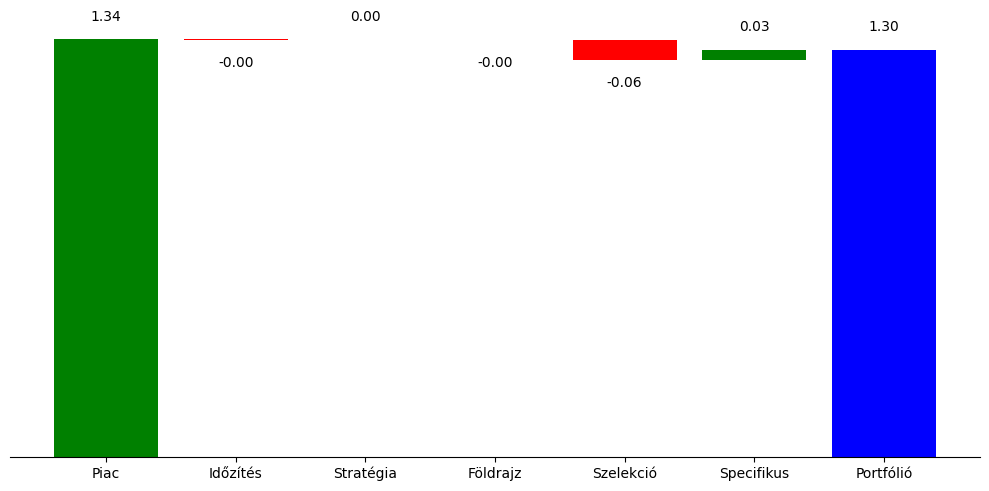

In [18]:
import matplotlib.pyplot as plt

# A bemeneti értékek
categories = ['Piac', 'Időzítés', 'Stratégia', 'Földrajz', 'Szelekció', 'Specifikus', 'Portfólió']
values = [market_moic, timing_alpha_moic, strategy_alpha_moic, geography_alpha_moic, sizing_alpha_moic, residual_alpha_moic,0]
values1 = [market_moic, timing_alpha_moic, strategy_alpha_moic, geography_alpha_moic, sizing_alpha_moic, residual_alpha_moic, portfolio_moic]


# Kiszámítjuk a kumulált értékeket (Portfólió nélkül)
step_values = [values[0]]
for v in values[1:-1]:  # az utolsó elem a Portfólió, azt külön kezeljük
    step_values.append(step_values[-1] + v)

# A kezdőpontok (bottom) az oszlopokhoz
starts = [0] + step_values[:-1]

# Az oszlop színezése: pozitív zöld, negatív piros, végső összeg kék
colors = ['green' if v >= 0 else 'red' for v in values[:-1]] + ['blue']

# A ténylegesen megjelenített értékek (Portfólió kumulált összegként)
display_values = values[:-1] + [step_values[-1] + values[-1]]
starts += [0]  # Portfólió a 0-ról indul

# Ábra kirajzolása
plt.figure(figsize=(10, 5))
bars = plt.bar(categories, display_values, bottom=starts, color=colors)

# Értékek kiírása oszlop tetejére
for i, bar in enumerate(bars):
    yval = bar.get_height()
    bottom = bar.get_y()
    # label_val = starts[i] + yval
    label_val = values1[i]
    plt.text(bar.get_x() + bar.get_width() / 2.0,
             bottom + yval + 0.05 * (1 if yval >= 0 else -1),
             f'{label_val:.2f}', ha='center', va='bottom' if yval >= 0 else 'top')

# Formázás
# plt.title("Portfólió teljesítmény vízesés diagramja")
# plt.ylabel("Hozzájárulás (%)")
# plt.axhline(0, color='black', linewidth=0.8)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.tight_layout()
plt.savefig("waterfall_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()


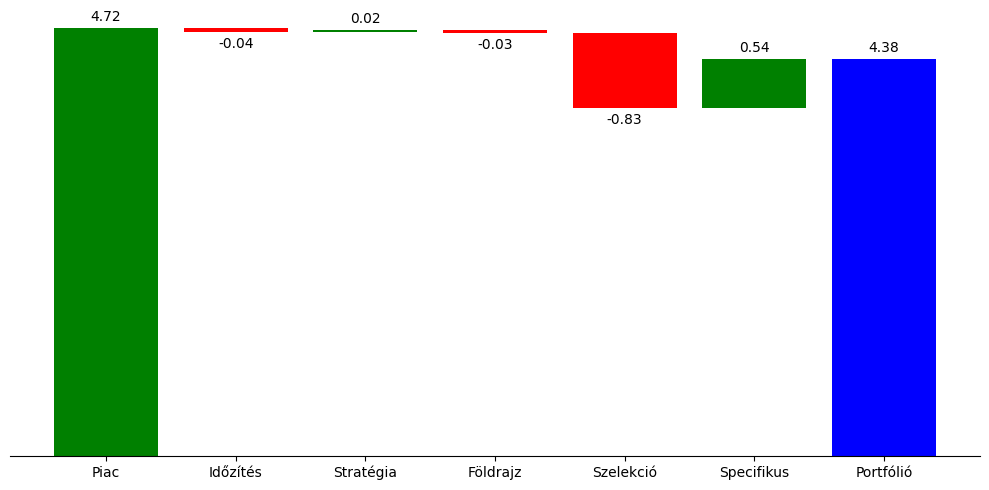

In [19]:
import matplotlib.pyplot as plt

# A bemeneti értékek
categories = ['Piac', 'Időzítés', 'Stratégia', 'Földrajz', 'Szelekció', 'Specifikus', 'Portfólió']
values =[market_irr*100, timing_alpha_irr*100, strategy_alpha_irr*100, geography_alpha_irr*100, sizing_alpha_irr*100, residual_alpha_irr*100,0]
values1 = [market_irr*100, timing_alpha_irr*100, strategy_alpha_irr*100, geography_alpha_irr*100, sizing_alpha_irr*100, residual_alpha_irr*100, portfolio_irr*100]


# Kiszámítjuk a kumulált értékeket (Portfólió nélkül)
step_values = [values[0]]
for v in values[1:-1]:  # az utolsó elem a Portfólió, azt külön kezeljük
    step_values.append(step_values[-1] + v)

# A kezdőpontok (bottom) az oszlopokhoz
starts = [0] + step_values[:-1]

# Az oszlop színezése: pozitív zöld, negatív piros, végső összeg kék
colors = ['green' if v >= 0 else 'red' for v in values[:-1]] + ['blue']

# A ténylegesen megjelenített értékek (Portfólió kumulált összegként)
display_values = values[:-1] + [step_values[-1] + values[-1]]
starts += [0]  # Portfólió a 0-ról indul

# Ábra kirajzolása
plt.figure(figsize=(10, 5))
bars = plt.bar(categories, display_values, bottom=starts, color=colors)

# Értékek kiírása oszlop tetejére
for i, bar in enumerate(bars):
    yval = bar.get_height()
    bottom = bar.get_y()
    # label_val = starts[i] + yval
    label_val = values1[i]
    plt.text(bar.get_x() + bar.get_width() / 2.0,
             bottom + yval + 0.05 * (1 if yval >= 0 else -1),
             f'{label_val:.2f}', ha='center', va='bottom' if yval >= 0 else 'top')

# Formázás
# plt.title("Portfólió teljesítmény vízesés diagramja")
# plt.ylabel("Hozzájárulás (%)")
# plt.axhline(0, color='black', linewidth=0.8)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.tight_layout()
plt.savefig("waterfall_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()


### Monte-Carlo simulation

In [40]:
cashflows = simulate_private_equity_cashflows()
market_model = model_builder(cashflows, cashflows)
market_model

({'Portfolio MOIC': 1.3296017218899154,
  'Market MOIC': 1.3296017218899154,
  'Timing Alpha MOIC': 2.220446049250313e-16,
  'Strategy Alpha MOIC': 2.220446049250313e-16,
  'Geography Alpha MOIC': 2.220446049250313e-16,
  'Sizing Alpha MOIC': -0.08160487671624184,
  'Residual Alpha MOIC': 0.08160487671624117},
 {'Portfolio IRR': 0.04722674506468805,
  'Market IRR': 0.04722674506468805,
  'Timing Alpha IRR': -1.249000902703301e-16,
  'Strategy Alpha IRR': -1.1796119636642288e-16,
  'Geography Alpha IRR': -1.1796119636642288e-16,
  'Sizing Alpha IRR': -0.010000490571362992,
  'Residual Alpha IRR': 0.010000490571363353})

In [42]:
number_of_simulations = 5
fund_size = 200
moic_results = []
irr_results = []

for i in range(number_of_simulations):
    port_cfs = portfolio_cashflows(cashflows, fund_size)
    port_cfs = port_cfs.copy()
    model = model_builder(cashflows, port_cfs)
    moic_results.append(model[0])
    irr_results.append(model[1])


In [43]:
def average_dicts(dict_list):
    """Compute the average of a list of dictionaries."""
    keys = dict_list[0].keys()
    avg_dict = {}
    for key in keys:
        avg_dict[key] = sum(d[key] for d in dict_list) / len(dict_list)
    return avg_dict

In [44]:
avg_moic_decomposition = average_dicts(moic_results)
avg_irr_decomposition = average_dicts(irr_results)

In [45]:
avg_irr_decomposition

{'Portfolio IRR': 0.04569076303506077,
 'Market IRR': 0.04722674506468805,
 'Timing Alpha IRR': -2.7422822344044805e-05,
 'Strategy Alpha IRR': -0.0003516806188911828,
 'Geography Alpha IRR': 0.00013666163625821598,
 'Sizing Alpha IRR': -0.010366180427381315,
 'Residual Alpha IRR': 0.009072640202731044}

In [33]:
avg_moic_decomposition

{'Portfolio MOIC': 1.3247429570030578,
 'Market MOIC': 1.3237699463807078,
 'Timing Alpha MOIC': 0.0004632175832280039,
 'Strategy Alpha MOIC': -0.0005605122069079238,
 'Geography Alpha MOIC': -7.803093571770336e-05,
 'Sizing Alpha MOIC': -0.07516094570141306,
 'Residual Alpha MOIC': 0.0763092818831603}